In [1]:
import pandas

In [2]:
!pip install --upgrade pycaret


In [3]:
from pycaret.datasets import get_data

In [4]:
df=get_data("insurance")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
from pycaret.regression import *

In [8]:
reg=setup(df,target='charges')

,Description,Value
0,Session id,8234
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [9]:
check_models=compare_models(exclude=['catboost'],fold=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2687.7000,22670177.4749,4738.0337,0.8355,0.4628,0.3317,0.1600
rf,Random Forest Regressor,2782.3606,24465595.1521,4928.5641,0.8223,0.4907,0.3540,0.6475
lightgbm,Light Gradient Boosting Machine,2959.2696,24900713.5985,4966.7717,0.8188,0.5800,0.3742,1.0475
et,Extra Trees Regressor,2815.7585,28248566.1396,5292.6950,0.7948,0.4982,0.3378,0.2775
xgboost,Extreme Gradient Boosting,3093.6626,28402913.5000,5319.8281,0.7919,0.5699,0.4106,0.1325
ada,AdaBoost Regressor,4250.5480,29284176.5004,5389.7433,0.7885,0.6433,0.7461,0.0825
ridge,Ridge Regression,4373.9861,38790125.7584,6201.0756,0.7195,0.5956,0.4374,0.0750
br,Bayesian Ridge,4369.0750,38793841.0293,6201.3393,0.7195,0.6027,0.4364,0.0750
lar,Least Angle Regression,4361.7685,38788757.6420,6200.9577,0.7194,0.6058,0.4350,0.0700
llar,Lasso Least Angle Regression,4361.8942,38788153.2815,6200.9038,0.7194,0.6065,0.4351,0.0825


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [10]:
!pip install --upgrade mlflow


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [15]:
reg=setup(df,target='charges')

,Description,Value
0,Session id,6754
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [17]:
grb=create_model('gbr',fold=4)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2717.1698,27143136.5607,5209.9075,0.8536,0.4724,0.2855
1,2858.5162,31707800.6880,5630.9680,0.8134,0.4778,0.2597
2,2677.4709,20152123.9301,4489.1117,0.8692,0.4040,0.3290
3,2489.7473,15863264.9211,3982.8714,0.8693,0.4076,0.3421
Mean,2685.7261,23716581.5250,4828.2147,0.8514,0.4405,0.3041
Std,131.6444,6123332.4822,636.3369,0.0228,0.0347,0.0331


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
rf=create_model('rf',fold=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2881.4516,30141852.2127,5490.1596,0.8374,0.4932,0.3024
1,3069.4016,33638142.2967,5799.8399,0.8020,0.4878,0.2715
2,2774.4871,21954326.9790,4685.5445,0.8575,0.4148,0.3298
3,2753.2571,19340567.7586,4397.7912,0.8407,0.4873,0.4094
Mean,2869.6494,26268722.3117,5093.3338,0.8344,0.4708,0.3283
Std,125.1432,5829297.1005,571.5534,0.0202,0.0324,0.0512


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
lightgbm=create_model('lightgbm',fold=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2974.9812,29627244.8170,5443.0915,0.8402,0.5318,0.3184
1,3172.9355,34754239.5011,5895.2726,0.7955,0.5233,0.2915
2,2817.7595,21498660.8398,4636.6648,0.8604,0.4596,0.3544
3,2953.4426,19996571.9693,4471.7527,0.8353,0.6265,0.4571
Mean,2979.7797,26469179.2818,5111.6954,0.8328,0.5353,0.3554
Std,126.7639,6025286.2954,582.8802,0.0235,0.0596,0.0628


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tune_gbr=tune_model(grb,n_iter=10,optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3135.5388,31479102.3818,5610.6241,0.8052,0.6454,0.3352
1,3430.0847,28072801.0415,5298.3772,0.8426,0.7178,0.4434
2,3953.5551,45005319.6045,6708.6004,0.7673,0.6378,0.4107
3,3610.6472,34161075.4584,5844.7477,0.8219,0.6155,0.3751
4,4158.4233,55542050.1921,7452.6539,0.6484,0.7126,0.3955
5,3525.3400,29159711.3337,5399.9733,0.8536,0.7372,0.3915
6,3329.3541,28149390.8758,5305.6000,0.7998,0.6620,0.4042
7,3583.7076,32959568.5213,5741.0425,0.6915,0.5361,0.4722
8,3538.1857,29225280.0412,5406.0411,0.7772,0.5599,0.4222


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
tune_lgbr=tune_model(lightgbm,n_iter=5,optimize="r2")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9875.2479,161219541.8704,12697.2258,0.0024,1.0292,1.5964
1,10008.3436,177455659.1746,13321.2484,0.0048,0.9983,1.4944
2,10823.8980,195982280.4270,13999.3671,-0.0135,1.0508,1.6051
3,10294.4704,194337648.8548,13940.5039,-0.0132,0.9898,1.3929
4,9195.9899,157484356.7160,12549.2771,0.0031,0.9691,1.4202
5,10509.2716,200402499.4832,14156.3590,-0.0060,1.0381,1.5620
6,9756.5046,141619334.2302,11900.3922,-0.0072,1.0906,1.8303
7,8196.6951,110168976.2055,10496.1410,-0.0313,1.0848,1.9016
8,8173.0893,131889423.1978,11484.3120,-0.0053,0.8833,1.2016


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [23]:
stacked_gbr=stack_models(estimator_list=[grb,rf,lightgbm],meta_model=tune_gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3175.9346,29911178.8132,5469.1113,0.8149,0.5480,0.4164
1,2375.6197,18386610.1650,4287.9611,0.8969,0.4693,0.3265
2,3125.0257,36793231.7712,6065.7425,0.8097,0.5059,0.3330
3,2806.0344,25973601.9770,5096.4303,0.8646,0.4338,0.3053
4,3557.8632,43399699.6943,6587.8448,0.7253,0.6160,0.4144
5,3011.9578,22873654.8948,4782.6410,0.8852,0.4193,0.3389
6,2722.8303,21791365.0254,4668.1222,0.8450,0.4525,0.3963
7,2956.5177,26964413.8182,5192.7270,0.7476,0.5304,0.4521
8,2591.9490,17031641.8932,4126.9410,0.8702,0.4526,0.3097


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [25]:
en_lgbm=ensemble_model(lightgbm,method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3660.4647,34627318.0726,5884.4981,0.7857,0.6862,0.4895
1,3374.6098,27412015.4314,5235.6485,0.8463,0.6032,0.4344
2,3939.5362,40559892.2254,6368.6649,0.7902,0.6191,0.5007
3,3690.5081,31644456.5537,5625.3406,0.8350,0.5309,0.4065
4,4197.2649,48050016.5508,6931.8119,0.6958,0.7164,0.4743
5,3575.0874,27003398.9619,5196.4795,0.8645,0.5869,0.4827
6,3454.7584,22731048.4298,4767.7089,0.8383,0.5273,0.4806
7,3889.2704,30769767.6653,5547.0504,0.7120,0.5826,0.6203
8,3538.1192,24526084.7875,4952.3817,0.8131,0.5256,0.4276


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [26]:
blender=blend_models(estimator_list=[grb,rf,lightgbm],fold=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2783.0522,28191943.0885,5309.6086,0.8479,0.4810,0.2892
1,2926.8112,32171485.5157,5671.9913,0.8107,0.4801,0.2587
2,2661.5744,19971915.2708,4468.9949,0.8703,0.4051,0.3245
3,2636.9612,17048170.8075,4128.9431,0.8596,0.4589,0.3826
Mean,2752.0997,24345878.6706,4894.8845,0.8471,0.4563,0.3137
Std,115.0368,6091396.1839,621.2768,0.0225,0.0308,0.0461


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

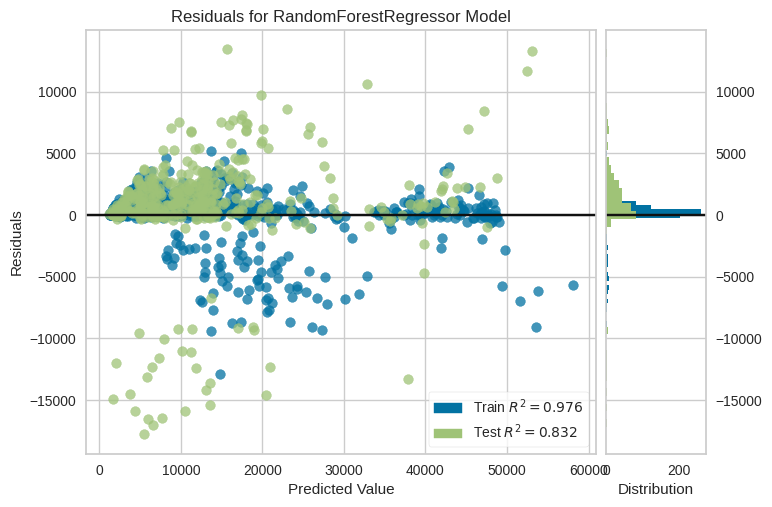

In [27]:
plot_model(rf)

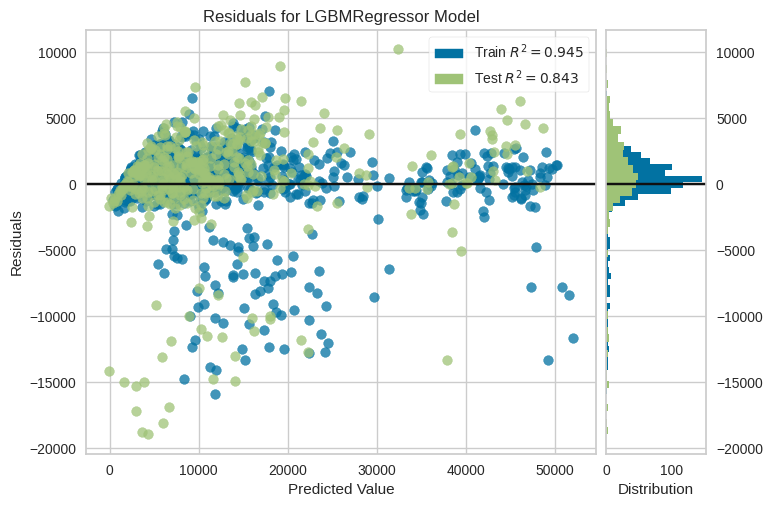

In [29]:
plot_model(lightgbm)

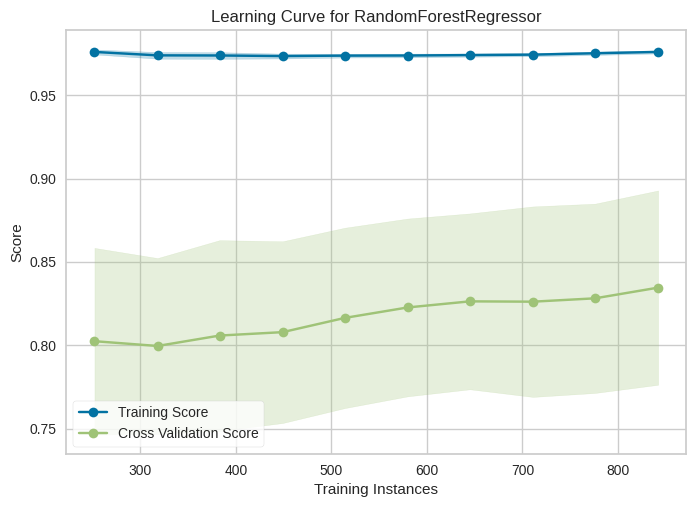

In [30]:
plot_model(rf,plot='learning')

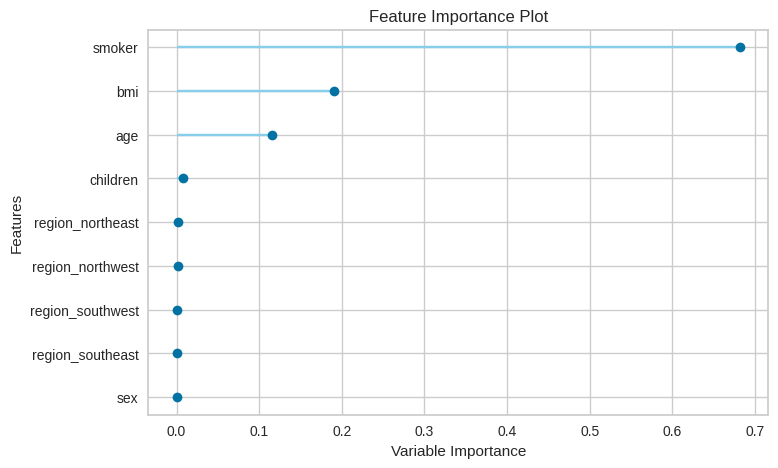

In [31]:
plot_model(grb,plot='feature')

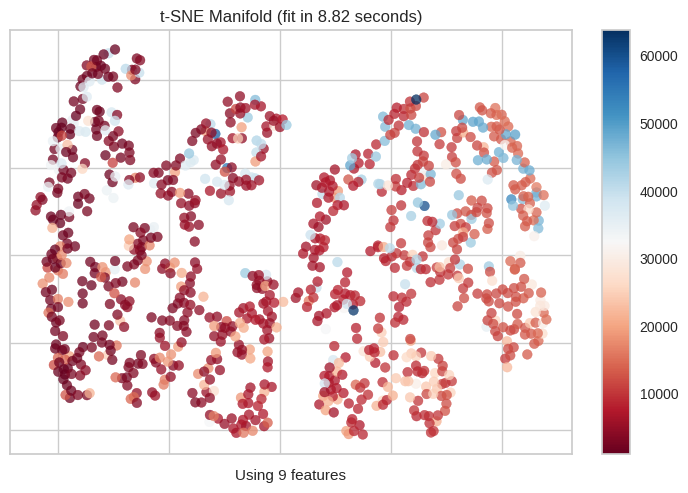

In [32]:
plot_model(grb,plot='manifold')

In [33]:
!pip install shap

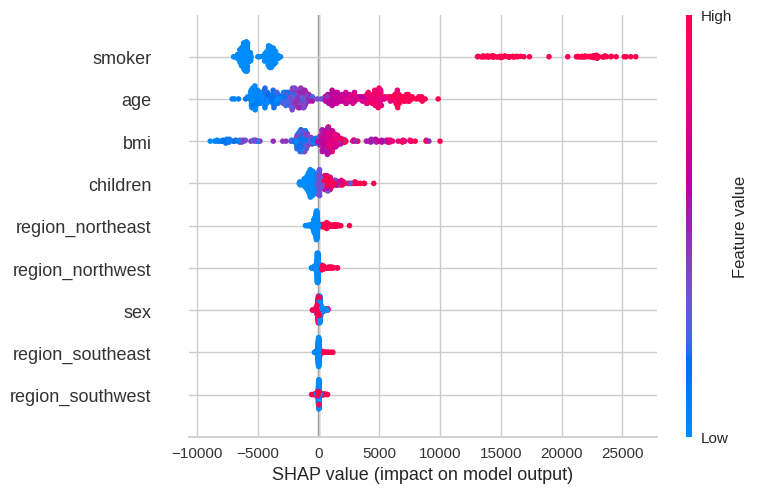

In [36]:
interpret_model(rf)